In [2]:
from google.colab import files
uploaded = files.upload()

Saving cancer.csv to cancer.csv


In [3]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read the data from the CSV file
df= pd.read_csv('cancer.csv')

In [5]:
# Display the first few rows of the dataset
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [6]:
# Generate descriptive statistics for the dataset
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


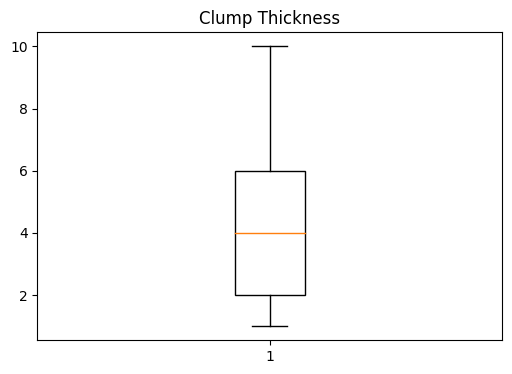

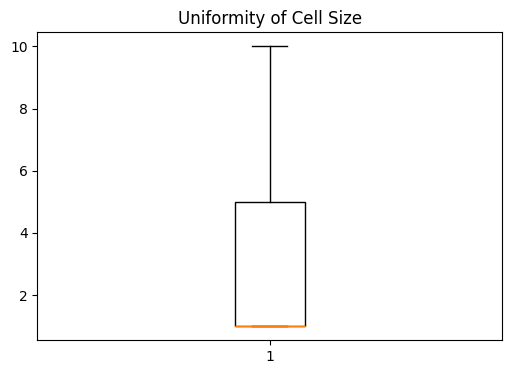

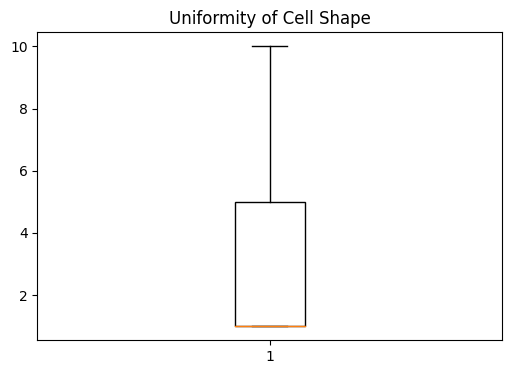

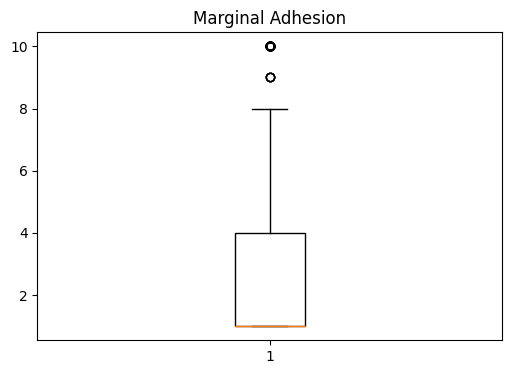

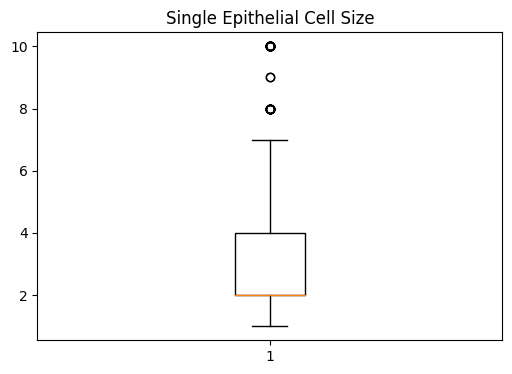

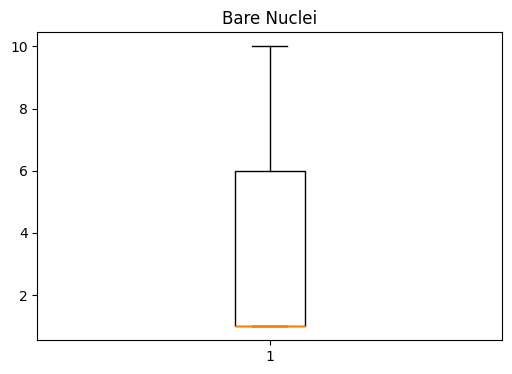

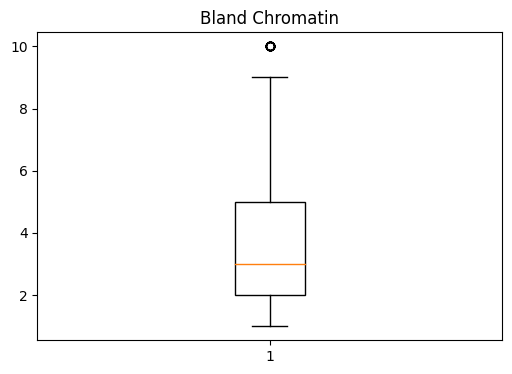

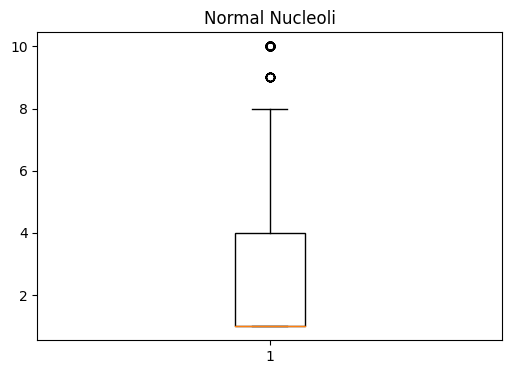

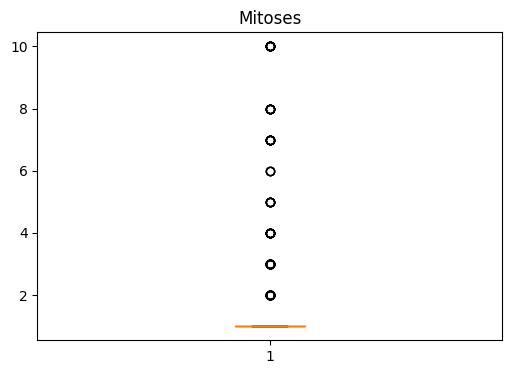

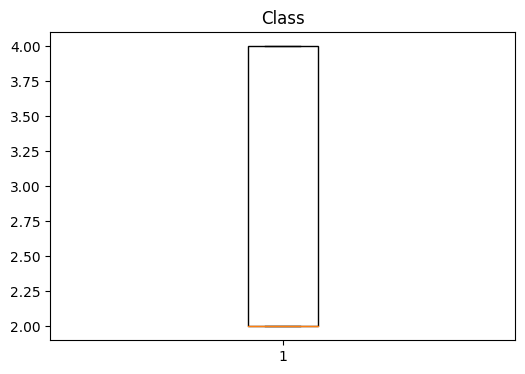

In [7]:
# Visualize box plots for each numerical feature

for i, column in enumerate(df.columns):
  plt.figure(figsize=(6, 4), facecolor='white')
  plt.boxplot(df[column], patch_artist=True, boxprops=dict(facecolor='white'))
  plt.title(column)
  print()
  plt.show()

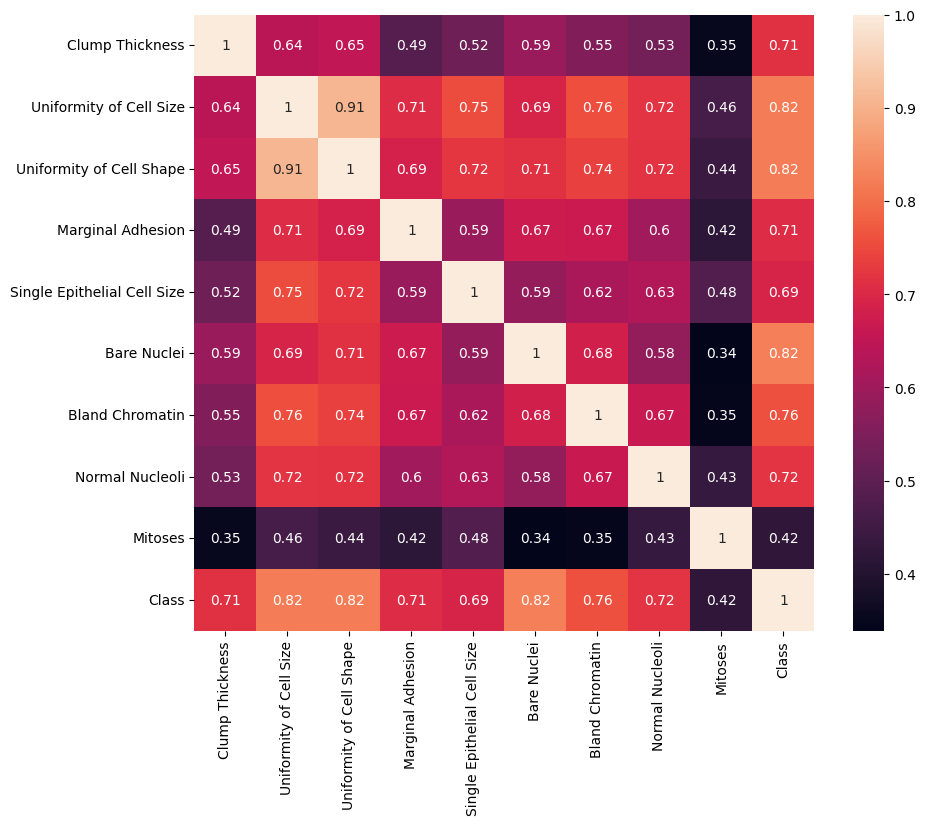

In [8]:
# Visualize the correlation matrix using a heatmap
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True)

plt.show()

In [9]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

In [93]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=55)

# Print the lengths of training and testing sets
print("Training set length:", len(X_train), "\nTesting set length:", len(X_test))
print("Training labels length:", len(y_train), "\nTesting labels length:", len(y_test))

Training set length: 478 
Testing set length: 205
Training labels length: 478 
Testing labels length: 205


In [98]:
# Import LogisticRegression from scikit-learn
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
prediction = model.predict(X_test)

# Calculate and print the accuracy score of the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9707317073170731


Confusion Matrix:
[[127   4]
 [  2  72]]


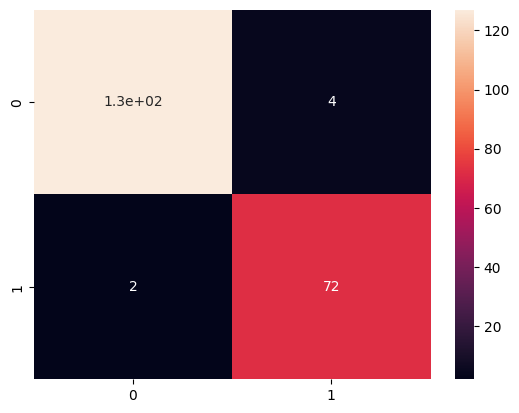

In [99]:
# Import confusion_matrix from scikit-learn
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, prediction)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True)
plt.show()

In [100]:
# Import classification_report from scikit-learn
from sklearn.metrics import classification_report

# Generate the classification report
clr = classification_report(y_test, prediction)

# Print the classification report
print("Classification Report:")
print(clr)

Classification Report:
              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205

